In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from scipy.stats import norm
import peakutils
from decimal import Decimal

def format_e(n):
    a = '%e' % Decimal(n)
    return a.split('e')[0].rstrip('0').rstrip('.')+'e'+a.split('e')[1]

def format_plt(n):
    a = '%e' % Decimal(n)
    return r'${'+a.split('e')[0].rstrip('0').rstrip('.')+'}}$'+r'${*10^{'+a.split('e')[1]+'}}$'

def comma_to_float(valstr):
    return float(valstr.decode('utf-8').replace(',','.'))

In [2]:
def gaussian1(x, y, mu, sig):
    return norm.pdf(x, mu, sig)*y

def gaussian2(x, y1, mu1, sig1, y2, mu2, sig2):
    return norm.pdf(x, mu1,sig1)*y1+norm.pdf(x, mu2,sig2)*y2

def fit_gaussian(i, j):
    if j%4 >= 2:
        if j%4 == 2:
            amplitude = amplitude_1
            freq_halb = freq_halb_1
        if j%4 == 3:
            amplitude = amplitude_2
            freq_halb = freq_halb_2
        indexes = peakutils.indexes(amplitude[i])
        init_vals = [0.0002,freq_halb[i][indexes[0]], 0.005]
        fitParams, fitCovariances = curve_fit(gaussian1, freq_halb[i], amplitude[i]) 
        
        plt.figure(2)
        plt.plot(freq_halb[i][indexes], amplitude[i][indexes],marker='*', linewidth=0) 
        plt.plot(np.linspace(0.2,1.2,1000),gaussian1(np.linspace(0.2,1.2,1000),*fitParams),  lw=1, color='C0',
                      label=r'$\mu = $'+format_plt(fitParams[1])+' Hz\n'
                      +r'$\sigma = $'+format_plt(fitParams[2])+' Hz\n'
                      +r'$FWHM = $'+format_plt(fitParams[2]*2.355)+' Hz') 
        fig
        ax[i, j%4].plot(freq_halb[i][indexes], amplitude[i][indexes],marker='*', linewidth=0) 
        ax[i, j%4].plot(np.linspace(0.2,1.2,1000),gaussian1(np.linspace(0.2,1.2,1000),*fitParams),  lw=1, color='C0',
                      label=r'$\mu = $'+format_plt(fitParams[1])+' Hz\n'
                      +r'$\sigma = $'+format_plt(fitParams[2])+' Hz\n'
                      +r'$FWHM = $'+format_plt(fitParams[2]*2.355)+' Hz') 

def fit_2gaussian(i, j):
    if j%4 >= 2:
        if j%4 == 2:
            amplitude = amplitude_1
            freq_halb = freq_halb_1
        if j%4 == 3:
            amplitude = amplitude_2
            freq_halb = freq_halb_2
        indexes = peakutils.indexes(amplitude[i])  # Suche Peaks für die Fitparameter
        init_vals = [0.0002,freq_halb[i][indexes[0]], 0.005,0.0002, freq_halb[i][indexes[1]], 0.005]
        fitParams, fitCovariances = curve_fit(gaussian2, freq_halb[i], amplitude[i],p0=init_vals)
        
        plt.figure(2)
        plt.plot(freq_halb[i][indexes], amplitude[i][indexes],marker='*', linewidth=0) 
        plt.plot(np.linspace(0.2,1.2,1000),gaussian2(np.linspace(0.2,1.2,1000),*fitParams), lw=1, color='C0',
                  label=r'$\mu = $'+format_plt(fitParams[1])+' Hz\n'
                  +r'$\sigma = $'+format_plt(fitParams[2])+' Hz\n'
                  +r'$FWHM = $'+format_plt(fitParams[2]*2.355)+' Hz\n'
                  +r'$\mu_1 = $'+format_plt(fitParams[4])+' Hz\n'
                  +r'$\sigma_2 = $'+format_plt(fitParams[5])+' Hz\n'
                  +r'$FWHM_2 = $'+format_plt(fitParams[5]*2.355)+' Hz')
        fig
        ax[i, j%4].plot(freq_halb[i][indexes], amplitude[i][indexes],marker='*', linewidth=0) 
        ax[i, j%4].plot(np.linspace(0.2,1.2,1000),gaussian2(np.linspace(0.2,1.2,1000),*fitParams), lw=1, color='C0',
                  label=r'$\mu = $'+format_plt(fitParams[1])+' Hz\n'
                  +r'$\sigma = $'+format_plt(fitParams[2])+' Hz\n'
                  +r'$FWHM = $'+format_plt(fitParams[2]*2.355)+' Hz\n'
                  +r'$\mu_1 = $'+format_plt(fitParams[4])+' Hz\n'
                  +r'$\sigma_2 = $'+format_plt(fitParams[5])+' Hz\n'
                  +r'$FWHM_2 = $'+format_plt(fitParams[5]*2.355)+' Hz')

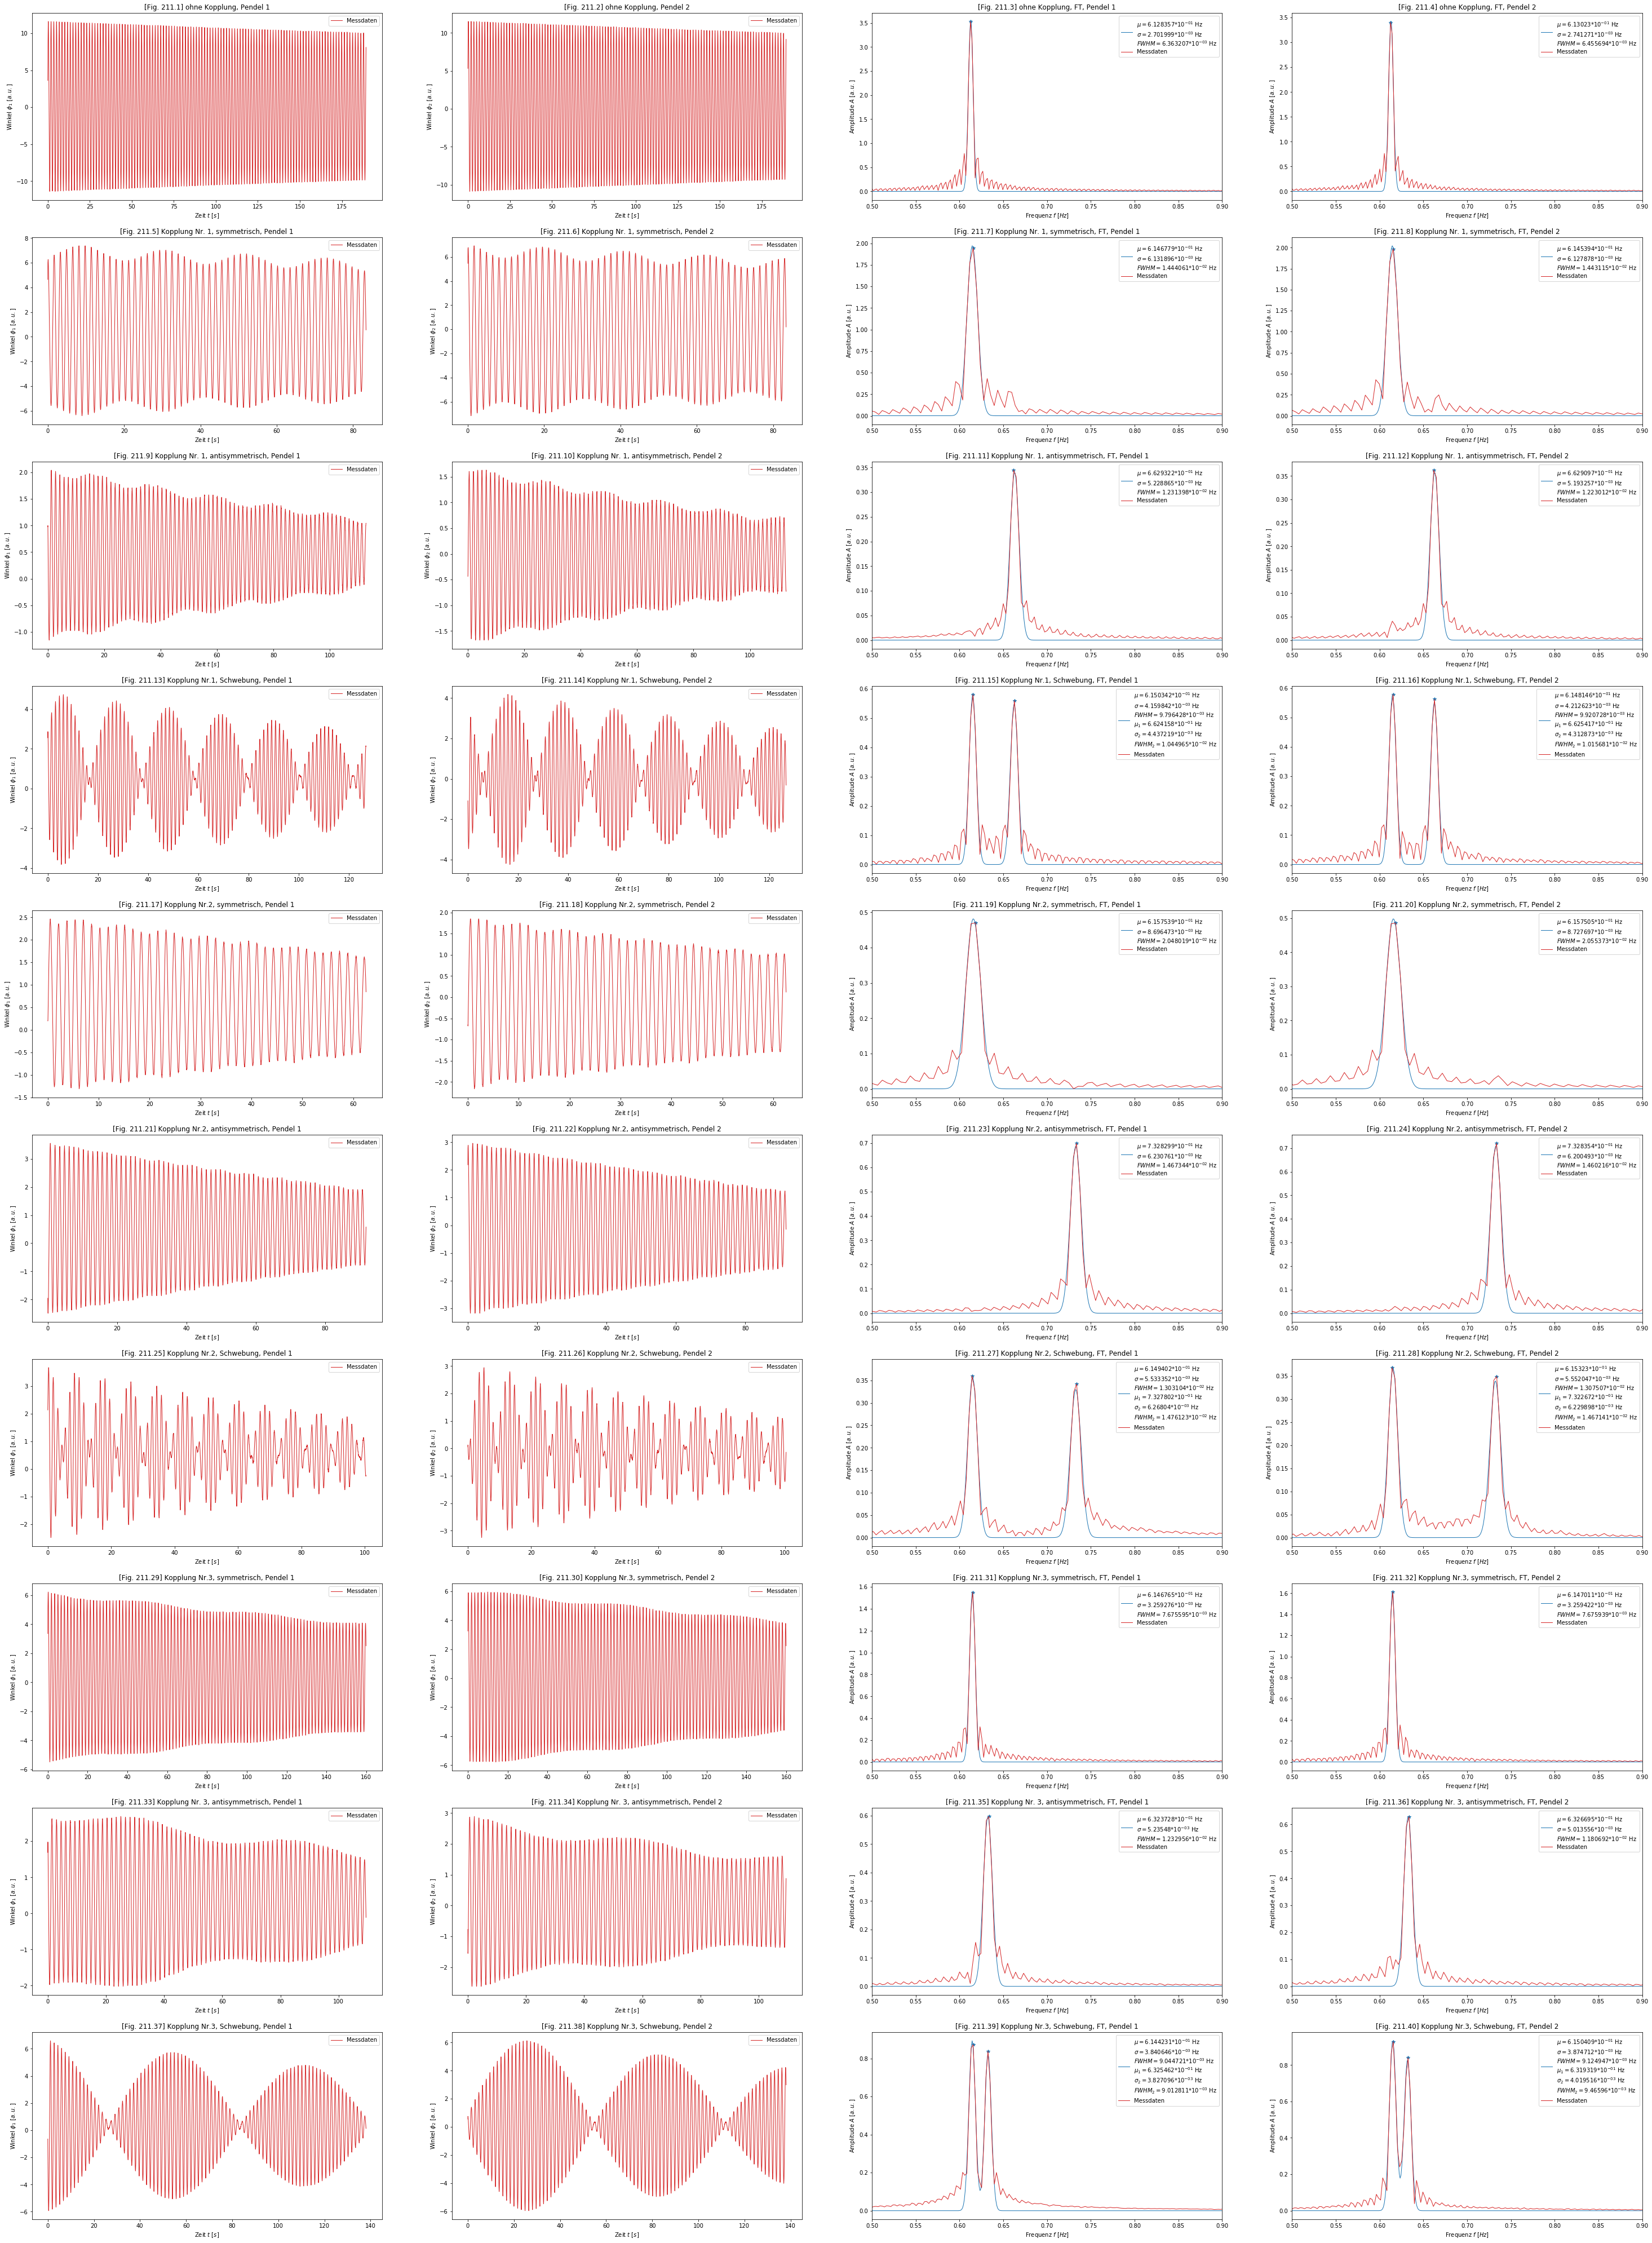

In [3]:
t = []
p1 = []
p2 = []
name = []
freq_halb_1 = []
freq_halb_2 = []
amplitude_1 = []
amplitude_2 = []
i = 0
while i < 10:
    t_temp, p1_temp, p2_temp = np.loadtxt('data\Messung'+str(i+1)+'.txt',skiprows=1,usecols=(0, 1, 2),
                                    converters={0:comma_to_float,1:comma_to_float, 2:comma_to_float},unpack=True)
    name_temp = open('data\Messung'+str(i+1)+'.txt', 'r').readline()
    
    name.append(name_temp.split('\n')[0])
    t.append(t_temp)
    p1.append(p1_temp)
    p2.append(p2_temp)
    
    dt=[]
    for j in range(len(t[i])-1): 
        dt.append(t[i][j+1]-t[i][j])
    timestep=np.mean(dt)
    
    #Fouriertransformation mit zeropadding
    spektrum_1 = np.fft.fft(np.concatenate((p1_temp, np.zeros(2*len(p1_temp)))))
    spektrum_2 = np.fft.fft(np.concatenate((p2_temp, np.zeros(2*len(p2_temp)))))  
    
    #spektrum = np.fft.fft(p1)  #Fouriertransformation    
    freq_1 = np.fft.fftfreq(spektrum_1.size, timestep)
    freq_2 = np.fft.fftfreq(spektrum_2.size, timestep)
    
    n_1=spektrum_1.size   #Nur positive Werte
    n_2=spektrum_2.size
    
    n_halb_1 = np.ceil(n_1/2.0)
    n_halb_2 = np.ceil(n_2/2.0)
    spektrum_halb_1 = (2.0 / int(n_1)) * spektrum_1[0:int(n_halb_1)]
    spektrum_halb_2 = (2.0 / int(n_2)) * spektrum_2[0:int(n_halb_2)]
    freq_halb_1_temp = freq_1[0:int(n_halb_1)]
    freq_halb_2_temp = freq_2[0:int(n_halb_2)]
    amplitude_1_temp=np.abs(spektrum_halb_1)
    amplitude_2_temp=np.abs(spektrum_halb_2)
    
    freq_halb_1.append(freq_halb_1_temp)
    freq_halb_2.append(freq_halb_2_temp)
    amplitude_1.append(amplitude_1_temp)
    amplitude_2.append(amplitude_2_temp)
    
    i = i+1

#Plot
fig, ax = plt.subplots(10, 4, num=1, figsize=[6.4*8, 4.8*15])
plt.figure(num=2, figsize=[6.4*2, 4.8*1.5])
i = 0
while i < 10:
    j = 0
    while j < 4:
        plt.figure(2).clf() 
        if i == 0 or i%3 == 1 or i%3 == 2:
            fit_gaussian(i, j)
        else:
            fit_2gaussian(i, j)
        if j%4 == 0:
            name_temp = name[i]+', Pendel 1'
            plt.figure(2)
            plt.plot(t[i], p1[i], 'C3-', lw=1, label='Messdaten')
            plt.xlabel('Zeit '+r'${t}$'+' '+r'${[s]}$')
            plt.ylabel('Winkel '+r'${{\phi_1}}$'+' '+r'${[a.u.]}$')
            fig
            ax[i, j].plot(t[i], p1[i], 'C3-', lw=1, label='Messdaten')
            ax[i, j].set_xlabel('Zeit '+r'${t}$'+' '+r'${[s]}$')
            ax[i, j].set_ylabel('Winkel '+r'${{\phi_1}}$'+' '+r'${[a.u.]}$')
        elif j%4 == 1:
            name_temp = name[i]+', Pendel 2'
            plt.figure(2)
            plt.plot(t[i], p2[i], 'C3-', lw=1, label='Messdaten')
            plt.xlabel('Zeit '+r'${t}$'+' '+r'${[s]}$')
            plt.ylabel('Winkel '+r'${{\phi_2}}$'+' '+r'${[a.u.]}$')
            fig
            ax[i, j].plot(t[i], p2[i], 'C3-', lw=1, label='Messdaten')
            ax[i, j].set_xlabel('Zeit '+r'${t}$'+' '+r'${[s]}$')
            ax[i, j].set_ylabel('Winkel '+r'${{\phi_2}}$'+' '+r'${[a.u.]}$')
        elif j%4 == 2:
            name_temp = name[i]+', FT, Pendel 1'
            plt.figure(2)
            plt.plot(freq_halb_1[i], amplitude_1[i], 'C3-', lw=1, label='Messdaten')
            plt.xlim([0.5,0.9])
            plt.xlabel('Frequenz '+r'${f}$'+' '+r'${[Hz]}$')
            plt.ylabel('Amplitude '+r'${A}$'+' '+r'${[a.u.]}$')
            fig
            ax[i, j].plot(freq_halb_1[i], amplitude_1[i], 'C3-', lw=1, label='Messdaten')
            ax[i, j].set_xlim([0.5,0.9])
            ax[i, j].set_xlabel('Frequenz '+r'${f}$'+' '+r'${[Hz]}$')
            ax[i, j].set_ylabel('Amplitude '+r'${A}$'+' '+r'${[a.u.]}$')
        else:
            name_temp = name[i]+', FT, Pendel 2'
            plt.figure(2)
            plt.plot(freq_halb_2[i], amplitude_2[i], 'C3-', lw=1, label='Messdaten')
            plt.xlim([0.5,0.9])
            plt.xlabel('Frequenz '+r'${f}$'+' '+r'${[Hz]}$')
            plt.ylabel('Amplitude '+r'${A}$'+' '+r'${[a.u.]}$')
            fig
            ax[i, j].plot(freq_halb_2[i], amplitude_2[i], 'C3-', lw=1, label='Messdaten')
            ax[i, j].set_xlim([0.5,0.9])
            ax[i, j].set_xlabel('Frequenz '+r'${f}$'+' '+r'${[Hz]}$')
            ax[i, j].set_ylabel('Amplitude '+r'${A}$'+' '+r'${[a.u.]}$')
        ax[i, j].title.set_text('[Fig. 211.'+str(i*4+j+1)+'] '+name_temp)
        ax[i, j].legend(loc='best')
        plt.figure(2)
        plt.title('[Fig. 211.'+str(i*4+j+1)+'] '+name_temp)
        plt.legend(loc='best')
        plt.figure(2)
        plt.savefig('figures/211_Fig1-40/211_Fig'+str(i*4+j+1)+'.pdf', format='pdf', bbox_inches='tight')
        fig
        j = j+1
    i = i+1

plt.close(2)
fig.savefig('figures/211_Fig1-40.pdf', format='pdf', bbox_inches='tight')